# PCML PROJECT

In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [6]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
print(tX.shape)

(250000, 30)


## Data Normalization 

In [170]:
def normalize(tX):
    nullValue = -999
    tX[tX==nullValue] = 0
    m = np.mean(tX, axis=0)
    tX_centered = tX - m

    tX_centered[tX_centered==0] = float('nan')
    tX_std= np.nanstd(tX_centered, axis=0)
    tX_centered[tX_centered==float('nan')] = 0
    normalized = tX_centered / tX_std
    return normalized

In [180]:
# Test normalize function
#print(tX)
#norm = normalize(tX)

In [120]:
# Probably useless

def removeNullColumns(tX, threshold):
    nullValue = -999
    rows, columns = tX.shape
    toDelete = []
    
    for column in range(0, columns):
        xi = tX[column]
        xi[xi == nullValue] = np.nan
        m = np.nansum(xi)
        if (m / rows > threshold):
            toDelete.append(column)
            
    print("Columns deleted: ", toDelete)
    new = np.delete(tX, toDelete)  
    print("new", new.shape)
    return new
        

In [75]:
# Probably useless too

def replaceNullValue(tX):
    nullValue = -999
    rows, columns = tX.shape
    x = tX
    
    for column in range(0, columns):
        xi = x[column]
        xi[xi == nullValue] = np.nan
        mean = np.mean(xi)
        nanIndex = np.where(np.isnan(xi))
        xi[nanIndex] = mean
        x[column] = xi
    return tX

## Process Machine Learning

In [76]:
from least_squares import *
from regression import *

def learn_with(method, y, tx, gamma=0.1, max_iters=5, lambda_=0.1):
    if method == 'least_squares':
        return least_squares(y, tx)
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, gamma, max_iters)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, gamma, max_iters)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, gamma, max_iters)

    if method == 'pen_logistic_regression': 
        return pen_logisitic_regression(y, tx, lambda_, gamma, max_iters)
    
    if method == 'ridge_regression': 
        return ridge_regression(y, tx, lambda_)
    
    return least_squares(y, tx)

### Training

In [185]:
from helpers import standardize

normalizedtX = normalize(tX)
print(normalizedtX.shape)
x = np.hstack((np.ones((normalizedtX.shape[0],1)), normalizedtX))
loss, weights = learn_with("least_square_GD", y, x)
print(weights.shape)

(250000, 30)
(31,)


## Optimazing

## Improving Least_Squares

We search the gamma parameter that minimize the loss.

gamma = 0.0,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 0.2631578947368421,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 0.5263157894736842,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 0.7894736842105263,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 1.0526315789473684,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 1.3157894736842104,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 1.5789473684210527,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 1.8421052631578947,  loss = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
gamma = 2.1052631578947367,  loss = [ 0.  0.  0.  0.  0.  0.  0

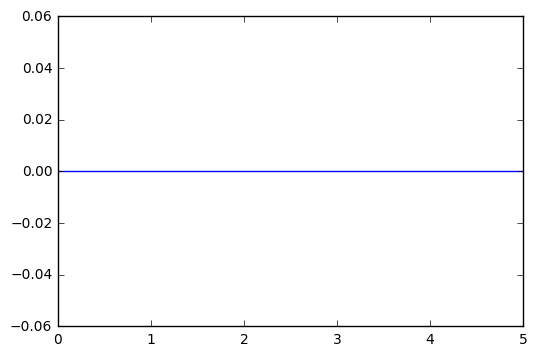

In [11]:
nbPoints = 20
gammaRange = np.linspace(0, 5, nbPoints)
losses = np.zeros(nbPoints)
    
for i in range(nbPoints):
    gamma = gammaRange[i]
    # crossvalidation
    #losses[i] = loss
    print("gamma = {},  loss = {}".format(gamma, loss))

plt.plot(gammaRange, losses)
bestGammaIdx = np.where(losses == np.ndarray.min(losses))
bestGamma = gammaRange[bestGammaIdx]
print("Best gamma value is: {}".format(best))

## Improving Logistic_regression

We search the gamma parameter that minimize the loss.

In [ ]:
nbPoints = 20
gammaRange = np.linspace(0, 5, nbPoints)
losses = np.zeros(nbPoints)
    
for i in range(nbPoints):
    gamma = gammaRange[i]
    # TODO crossvalidation
    #losses[i] = loss
    print("gamma = {},  loss = {}".format(gamma, loss))

plt.plot(gammaRange, losses)
bestGammaIdx = np.where(losses == np.ndarray.min(losses))
bestGamma = gammaRange[bestGammaIdx]
print("Best gamma value is: {}".format(best))

## Improving Penalized Logistic Regression

We need to optimize the parameters lambda and gamma in order to minimize the loss

In [ ]:
TODO

### Predicting

In [186]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape)



(568238, 30)


## Prepare tX_test

In [187]:
tXTe = normalize(tX_test)
tXTe = np.hstack((np.ones((tX_test.shape[0],1)), tXTe))


In [189]:
OUTPUT_PATH = '../output/out.csv'

y_pred = predict_labels(weights, tXTe)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)